# Récupération des données

In [12]:
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
import xgboost as xgb
%matplotlib inline
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)

In [11]:
data = pandas.read_csv('../04-house-prices/origin-trainfull.csv', index_col=0)
test = pandas.read_csv('../04-house-prices/origin-test.csv', index_col=0)

In [13]:
Y_train = pandas.DataFrame(data.SalePrice)
Y_train

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000
...,...
1456,175000
1457,210000
1458,266500


In [14]:
X_train = data.drop('SalePrice', axis=1)
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal


In [15]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


## Remise en forme des données

In [16]:
print(X_train.shape)
print(Y_train.shape)

(1460, 79)
(1460, 1)


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [18]:
train_and_test = X_train.append(test)
train_and_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [19]:
train_and_test = train_and_test.dropna(axis=1)

In [20]:
train_and_test.shape

(2919, 45)

In [21]:
var_quant = train_and_test.select_dtypes(exclude='object')
var_quant

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,856,854,0,1710,...,0,0,61,0,0,0,0,0,2,2008
2,20,9600,6,8,1976,1976,1262,0,0,1262,...,1,298,0,0,0,0,0,0,5,2007
3,60,11250,7,5,2001,2002,920,866,0,1786,...,1,0,42,0,0,0,0,0,9,2008
4,70,9550,7,5,1915,1970,961,756,0,1717,...,1,0,35,272,0,0,0,0,2,2006
5,60,14260,8,5,2000,2000,1145,1053,0,2198,...,1,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,1936,4,7,1970,1970,546,546,0,1092,...,0,0,0,0,0,0,0,0,6,2006
2916,160,1894,4,5,1970,1970,546,546,0,1092,...,0,0,24,0,0,0,0,0,4,2006
2917,20,20000,5,7,1960,1996,1224,0,0,1224,...,1,474,0,0,0,0,0,0,9,2006


In [22]:
var_qual = train_and_test.select_dtypes(include='object')
var_qual

,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,PavedDrive,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,
1,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
2,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,Y,Normal
3,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
4,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,TA,TA,BrkTil,GasA,Gd,Y,Y,Abnorml
5,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,Gd,TA,PConc,GasA,Ex,Y,Y,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,TA,TA,CBlock,GasA,Gd,Y,Y,Normal
2916,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,TA,TA,CBlock,GasA,TA,Y,Y,Abnorml
2917,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,TA,TA,CBlock,GasA,Ex,Y,Y,Abnorml


## One hot encoding

In [23]:
var_qual_dummy = pandas.get_dummies(var_qual)
var_qual_dummy

,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
3,0,1,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
4,0,1,1,0,0,0,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0
5,0,1,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0,1,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
2916,0,1,0,0,0,1,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0
2917,0,1,0,0,0,1,0,0,0,1,...,1,0,0,1,1,0,0,0,0,0


In [24]:
var_qual_dummy.shape

(2919, 124)

In [25]:
train_and_test = var_quant.join(var_qual_dummy)
train_and_test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,856,854,0,1710,...,1,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,1262,0,0,1262,...,1,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,920,866,0,1786,...,1,0,0,1,0,0,0,0,1,0
4,70,9550,7,5,1915,1970,961,756,0,1717,...,1,0,0,1,1,0,0,0,0,0
5,60,14260,8,5,2000,2000,1145,1053,0,2198,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,1936,4,7,1970,1970,546,546,0,1092,...,1,0,0,1,0,0,0,0,1,0
2916,160,1894,4,5,1970,1970,546,546,0,1092,...,1,0,0,1,1,0,0,0,0,0
2917,20,20000,5,7,1960,1996,1224,0,0,1224,...,1,0,0,1,1,0,0,0,0,0


In [26]:
X_train = train_and_test[:1460]
X_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,856,854,0,1710,...,1,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,1262,0,0,1262,...,1,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,920,866,0,1786,...,1,0,0,1,0,0,0,0,1,0
4,70,9550,7,5,1915,1970,961,756,0,1717,...,1,0,0,1,1,0,0,0,0,0
5,60,14260,8,5,2000,2000,1145,1053,0,2198,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,953,694,0,1647,...,1,0,0,1,0,0,0,0,1,0
1457,20,13175,6,6,1978,1988,2073,0,0,2073,...,1,0,0,1,0,0,0,0,1,0
1458,70,9042,7,9,1941,2006,1188,1152,0,2340,...,1,0,0,1,0,0,0,0,1,0


In [27]:
test = train_and_test[1460:]
test

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,11622,5,6,1961,1961,896,0,0,896,...,1,0,0,1,0,0,0,0,1,0
1462,20,14267,6,6,1958,1958,1329,0,0,1329,...,1,0,0,1,0,0,0,0,1,0
1463,60,13830,5,5,1997,1998,928,701,0,1629,...,1,0,0,1,0,0,0,0,1,0
1464,60,9978,6,6,1998,1998,926,678,0,1604,...,1,0,0,1,0,0,0,0,1,0
1465,120,5005,8,5,1992,1992,1280,0,0,1280,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,1936,4,7,1970,1970,546,546,0,1092,...,1,0,0,1,0,0,0,0,1,0
2916,160,1894,4,5,1970,1970,546,546,0,1092,...,1,0,0,1,1,0,0,0,0,0
2917,20,20000,5,7,1960,1996,1224,0,0,1224,...,1,0,0,1,1,0,0,0,0,0


# Modèle xgboost

In [28]:
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)

[14:26:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

## Génération des prédictions

In [154]:
y_predict = model.predict(X_train)

In [155]:
from sklearn import metrics
print('MSLE : ', round(metrics.mean_squared_log_error(y_train, y_predict), 5))
print('MAE : ', round(metrics.mean_absolute_error(y_train, y_predict)))

MSLE :  0.01184
MAE :  13137.0


## Prédictions sur test

In [157]:
test_predict = model.predict(test)
test_predict

array([126285.84, 159418.  , 170404.58, ..., 149744.2 , 135351.1 ,
       230349.58], dtype=float32)

## Mise au format final et envoi

In [174]:
submission = pandas.DataFrame({'Id': range(1461, 2920), 'SalePrice': test_predict})
submission

,Id,SalePrice
0,1461,126285.844
1,1462,159418.000
2,1463,170404.578
3,1464,186783.250
4,1465,202889.031
...,...,...
1454,2915,94737.867
1455,2916,85744.359
1456,2917,149744.203
1457,2918,135351.094


In [2]:
submission_file = "test_predict.csv"
submission.to_csv(submission_file, index=False)

NameError: name 'submission' is not defined

In [3]:
import kaggle
competition = 'house-prices-advanced-regression-techniques'

In [5]:
kaggle.api.competition_submit(submission_file, "02-P-xgboost-with-dummy-qual", competition)

100%|██████████| 21.2k/21.2k [00:04<00:00, 4.35kB/s]


Successfully submitted to House Prices: Advanced Regression Techniques

In [6]:
kaggle.api.competitions_submissions_list(competition)

[{'ref': 13585395,
  'totalBytes': 21698,
  'date': '2019-12-02T14:04:30.217Z',
  'description': '02-P-xgboost-with-dummy-qual',
  'errorDescription': None,
  'fileName': 'test_predict.csv',
  'publicScore': '0.14754',
  'privateScore': None,
  'status': 'complete',
  'submittedBy': 'laurent33',
  'submittedByRef': 'laurent33',
  'teamName': 'laurent33',
  'type': 'standard',
  'url': 'https://www.kaggle.com/submissions/13585395/13585395.raw'},
 {'ref': 13572231,
  'totalBytes': 33912,
  'date': '2019-12-01T17:01:38.14Z',
  'description': '01-R-randomforest-with-mssub-qual',
  'errorDescription': None,
  'fileName': 'test_predict.csv',
  'publicScore': '0.15256',
  'privateScore': None,
  'status': 'complete',
  'submittedBy': 'laurent33',
  'submittedByRef': 'laurent33',
  'teamName': 'laurent33',
  'type': 'standard',
  'url': 'https://www.kaggle.com/submissions/13572231/13572231.raw'},
 {'ref': 13572096,
  'totalBytes': 33943,
  'date': '2019-12-01T16:47:36Z',
  'description': '01-R

# Importance des features dans le modèle

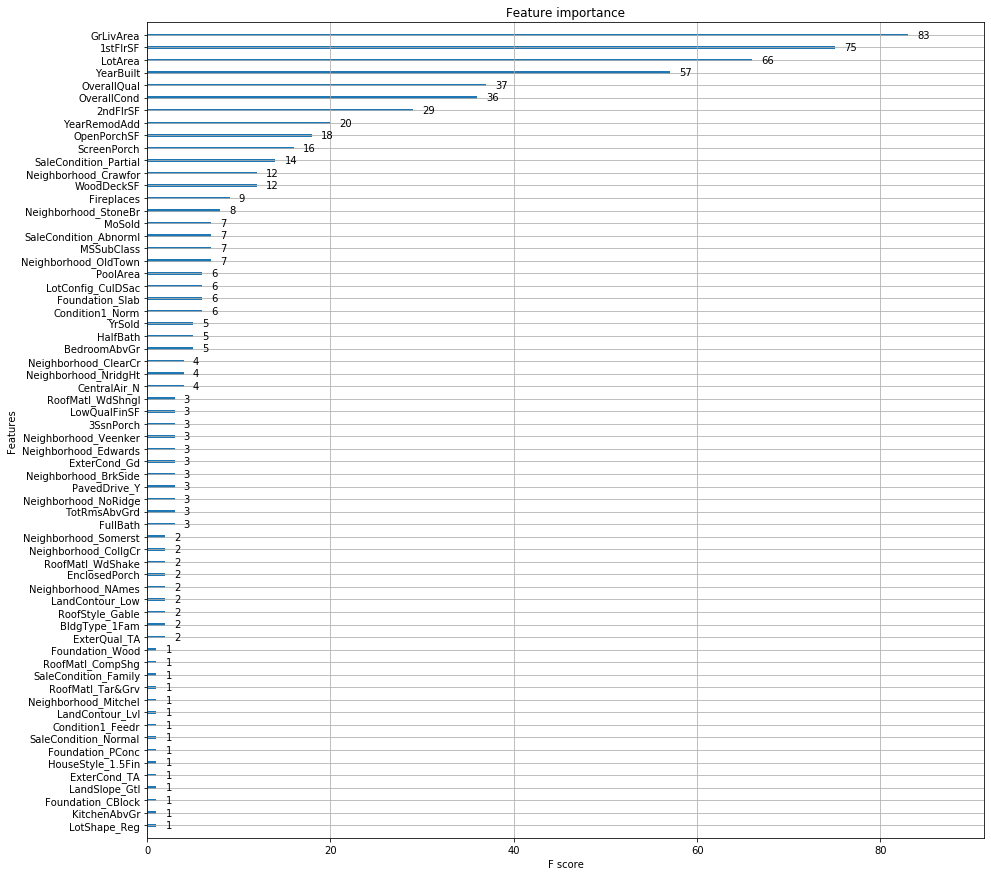

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
xgb.plot_importance(model, ax = ax);